# **House Price Prediction**

In [3]:
#dataset : https://media.geeksforgeeks.org/wp-content/uploads/20240905183434/HousePricePrediction.xlsx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("HousePricePrediction (1).xlsx")

print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [4]:
dataset.shape

(2919, 13)

In [5]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 6
Float variables: 3


<Axes: >

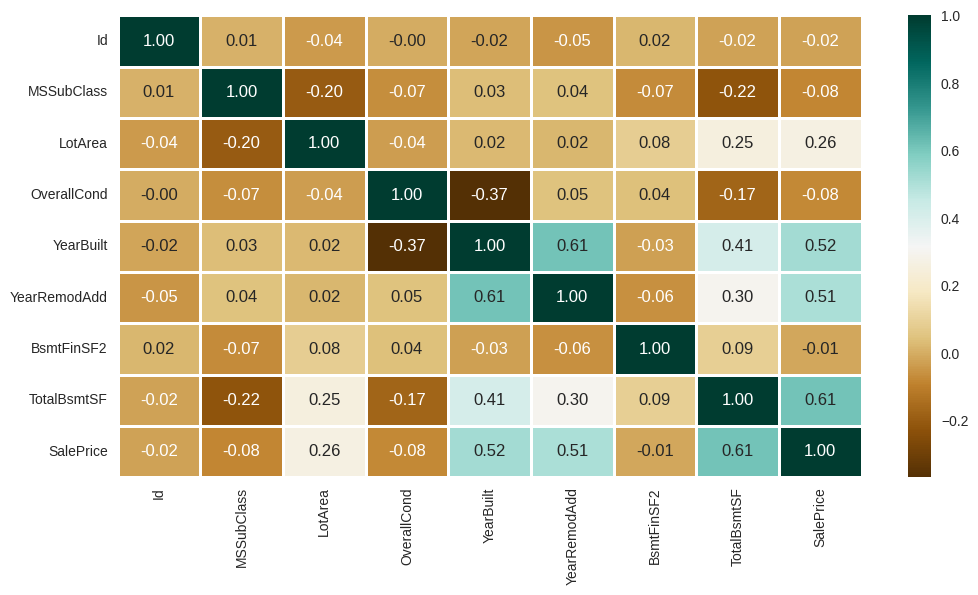

In [6]:
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

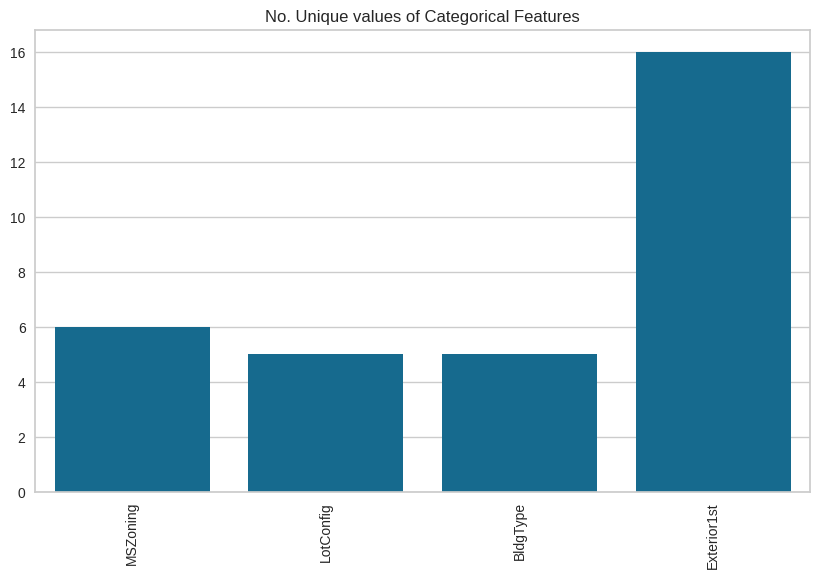

In [7]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

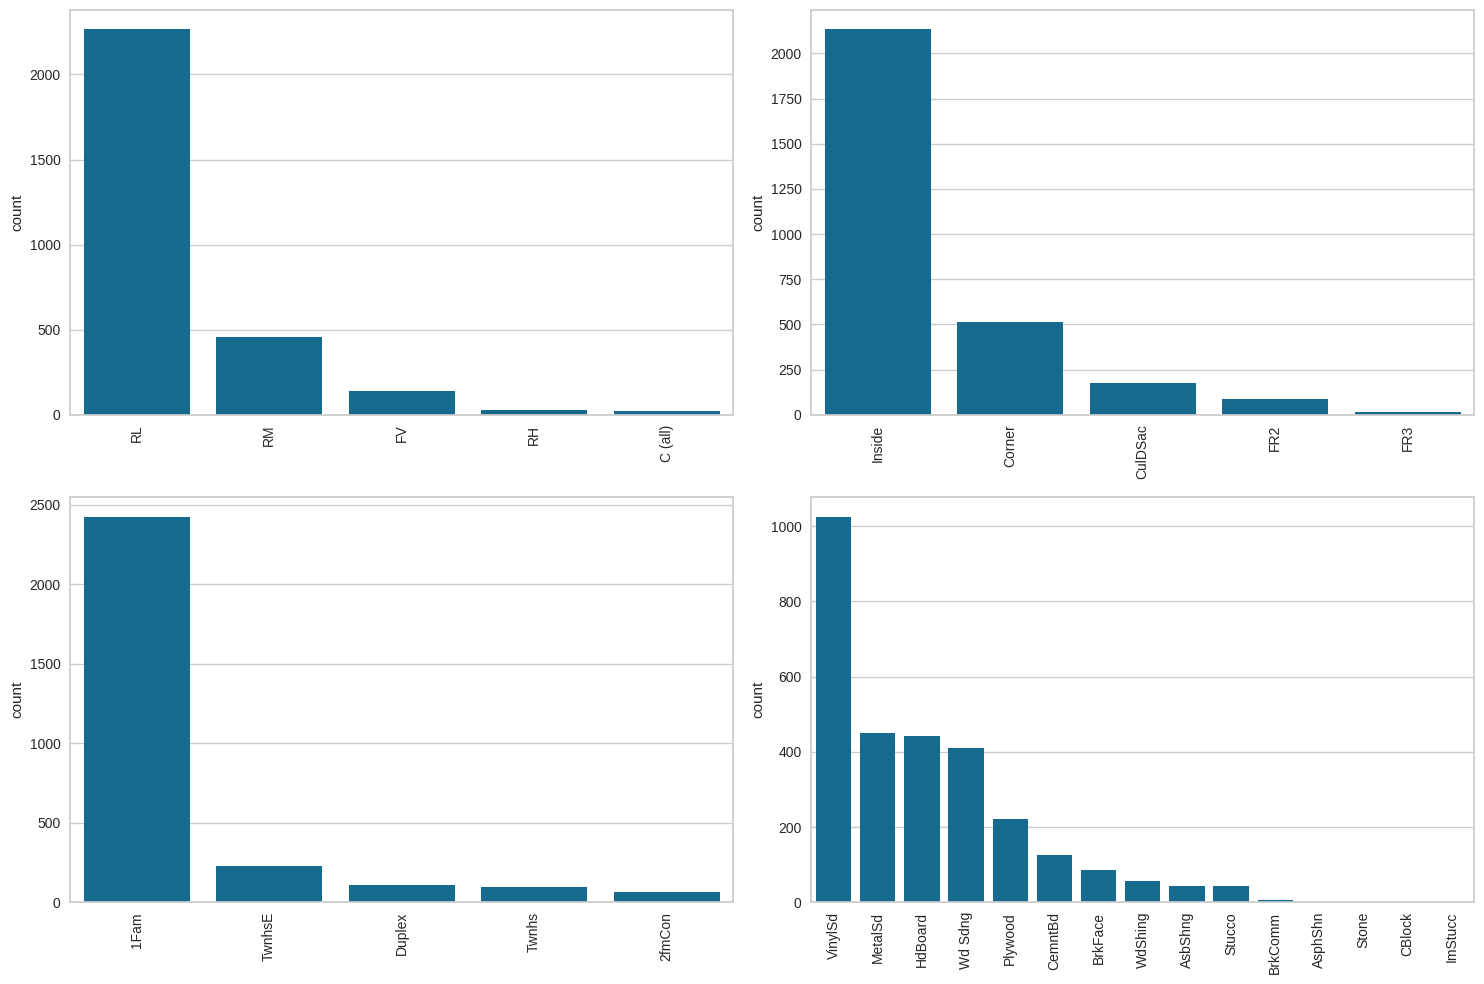

In [8]:
plt.figure(figsize=(15, 10))
plt.title('Categorical Features: Distribution')
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(2, 2, index) # Adjust subplot grid
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1
plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

In [9]:
dataset.drop(['Id'], axis=1, inplace=True)
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean())
new_dataset = dataset.dropna()

In [10]:
new_dataset.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0
BsmtFinSF2,0


In [11]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [12]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [13]:
%pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 59.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.

In [14]:
# comparing the models
from pycaret.regression import *

# Step 1: Load dataset and initialize setup
reg = setup(data= new_dataset, target='SalePrice', session_id=123)

# Step 2: Compare models
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(2913, 12)"
4,Transformed data shape,"(2913, 36)"
5,Transformed train set shape,"(2039, 36)"
6,Transformed test set shape,"(874, 36)"
7,Numeric features,7
8,Categorical features,4
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,31135.8738,1967922734.7452,44030.7993,0.3341,0.2361,0.1881,0.9980
catboost,CatBoost Regressor,31245.0442,1998458519.6615,44330.0810,0.3278,0.2360,0.1877,2.3060
gbr,Gradient Boosting Regressor,31524.0145,2028919804.0812,44711.1226,0.3109,0.2346,0.1891,0.3710
et,Extra Trees Regressor,31232.4849,2098110206.0419,45355.4681,0.2954,0.2416,0.1876,0.7270
ridge,Ridge Regression,32119.2173,2155165168.5025,45873.7936,0.2840,0.2378,0.1905,0.0880
lasso,Lasso Regression,32179.8769,2159683055.6943,45920.3040,0.2825,0.2382,0.1908,0.0980
llar,Lasso Least Angle Regression,32179.8772,2159683109.4390,45920.3047,0.2825,0.2382,0.1908,0.1380
lr,Linear Regression,32186.1947,2160327421.9578,45927.2643,0.2823,0.2383,0.1909,0.7490
lightgbm,Light Gradient Boosting Machine,32258.5356,2137116081.3239,45877.2396,0.2771,0.2430,0.1934,0.8320
en,Elastic Net,32178.6401,2189792225.4966,46279.1306,0.2708,0.2393,0.1916,0.0700


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [15]:
#metrics will be MAPE since the problem is a  regression problem
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.18944417826615756